In [1]:
using TestImages
using Pkg
Pkg.activate("/Users/jiyong/development/Projects/nImageData.jl")
using nImageData

  Activating project at `~/development/Projects/nImageData.jl`


In [2]:
X = round.(UInt8, Float32.(testimage("cameraman"))*255)

512×512 Matrix{UInt8}:
 0x9c  0x9d  0xa0  0x9f  0x9e  0x9c  …  0x97  0x96  0x97  0x98  0x98  0x98
 0x9c  0x9d  0x9f  0x9e  0x9e  0x9c     0x97  0x96  0x97  0x98  0x98  0x98
 0x9e  0x9d  0x9c  0x9c  0x9d  0x9d     0x99  0x98  0x99  0x98  0x98  0x98
 0xa0  0x9d  0x9a  0x9a  0x9c  0x9d     0x9a  0x9a  0x9b  0x99  0x98  0x98
 0x9e  0x9d  0x9c  0x9c  0x9d  0x9c     0x98  0x98  0x99  0x99  0x98  0x98
 0x9c  0x9d  0x9f  0x9f  0x9f  0x9c  …  0x97  0x97  0x98  0x99  0x99  0x99
 0x9e  0x9d  0x9c  0x9c  0x9d  0x9c     0x98  0x98  0x99  0x99  0x99  0x99
 0xa0  0x9d  0x9a  0x9a  0x9c  0x9d     0x9a  0x9a  0x9a  0x99  0x99  0x99
 0x9e  0x9b  0x99  0x99  0x9b  0x9d     0x99  0x99  0x98  0x98  0x98  0x98
 0x9c  0x9a  0x99  0x99  0x9b  0x9d     0x99  0x98  0x97  0x97  0x98  0x98
    ⋮                             ⋮  ⋱                             ⋮  
 0x62  0x6a  0x72  0x72  0x6f  0x64     0x66  0x72  0x7d  0x75  0x6b  0x69
 0x6f  0x70  0x71  0x73  0x75  0x70     0x75  0x7b  0x7e  0x78  0x72  0x70
 0x7e 

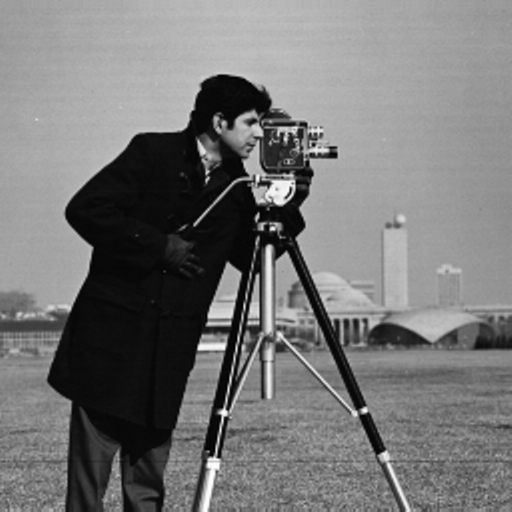

In [3]:
idt = ImageData(X)
mat2gray(idt)

In [4]:
idt2=sand_pepper_noise(idt, 0.03)

512×512 ImageData{UInt8}:
 0x9c  0x9d  0xa0  0x9f  0x9e  0x9c  …  0x97  0x96  0x97  0x98  0x98  0x98
 0x9c  0x9d  0x9f  0x9e  0x9e  0x9c     0x97  0x96  0x97  0x98  0x98  0x98
 0x9e  0x9d  0x9c  0x9c  0x9d  0x9d     0x99  0x98  0x99  0x98  0x98  0x98
 0xa0  0x9d  0x9a  0x9a  0x9c  0x9d     0x9a  0x9a  0x9b  0x99  0x98  0x98
 0x9e  0x9d  0x9c  0x9c  0x9d  0x9c     0x98  0x98  0x99  0x99  0x98  0x98
 0x9c  0x9d  0x9f  0x9f  0x9f  0x9c  …  0x97  0x97  0x98  0x99  0x99  0x99
 0x9e  0x9d  0x9c  0x9c  0x9d  0x9c     0x98  0x98  0x99  0x99  0x99  0x99
 0xa0  0x9d  0x9a  0x9a  0x9c  0x9d     0x9a  0x9a  0x9a  0x99  0x99  0x00
 0x9e  0x9b  0x99  0x99  0x9b  0x9d     0x99  0x99  0x98  0x98  0x98  0x98
 0x9c  0x9a  0x99  0x99  0x9b  0x9d     0x99  0x98  0x97  0x97  0x98  0x98
    ⋮                             ⋮  ⋱                             ⋮  
 0x62  0x6a  0x72  0x72  0x6f  0x64     0x66  0x72  0xff  0x75  0x6b  0x69
 0x6f  0x70  0x71  0x73  0x75  0x70     0x75  0x7b  0x7e  0x78  0x72  0x70
 0x

In [5]:
mdf = MedianFilter(5)

MedianFilter(5)

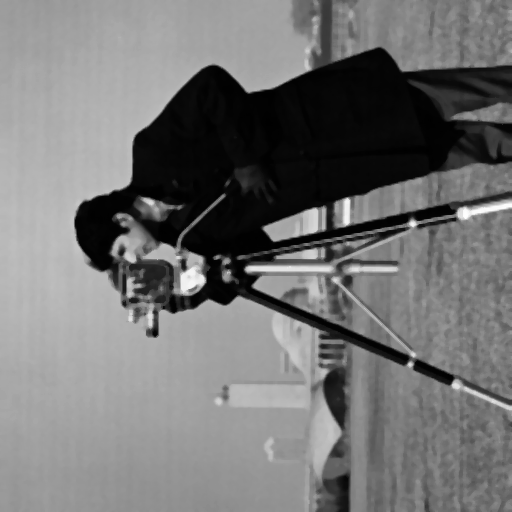

In [7]:
mat2gray(mdf(idt2.mat)[:,:,1])